# Instalasi Package

In [2]:
# Install package dasar
!pip install pandas numpy matplotlib seaborn

# Install Kaggle API (untuk download dataset dari Kaggle)
#!pip install kaggle

# Install library tambahan (jika diperlukan)
#!pip install openpyxl sqlalchemy kagglehub
!pip install kagglehub


# Input Data

In [3]:
import kagglehub
import os
import pandas as pd

# Download latest version
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

C:\Users\Rozan\anaconda3\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\Rozan\.cache\kagglehub\datasets\olistbr\brazilian-ecommerce\versions\2


In [4]:
# List semua file di direktori dataset
files = os.listdir(path)
print("Daftar file yang tersedia:", files)

Daftar file yang tersedia: ['olist_customers_dataset.csv', 'olist_geolocation_dataset.csv', 'olist_orders_dataset.csv', 'olist_order_items_dataset.csv', 'olist_order_payments_dataset.csv', 'olist_order_reviews_dataset.csv', 'olist_products_dataset.csv', 'olist_sellers_dataset.csv', 'product_category_name_translation.csv']


 # Data Scheme
 <img src="https://i.imgur.com/HRhd2Y0.png" alt="data-scheme" width="1000"/>


In [5]:
"""
# Contoh: Baca file orders
orders_path = os.path.join(path, "olist_orders_dataset.csv")
orders_df = pd.read_csv(orders_path)

# Contoh: Baca file products
products_path = os.path.join(path, "olist_products_dataset.csv")
products_df = pd.read_csv(products_path)

print("Orders Data:")
print(orders_df.head())
"""

'\n# Contoh: Baca file orders\norders_path = os.path.join(path, "olist_orders_dataset.csv")\norders_df = pd.read_csv(orders_path)\n\n# Contoh: Baca file products\nproducts_path = os.path.join(path, "olist_products_dataset.csv")\nproducts_df = pd.read_csv(products_path)\n\nprint("Orders Data:")\nprint(orders_df.head())\n'

In [6]:
# List semua file CSV
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]

# Baca semua CSV ke dictionary of DataFrames
dataframes = {}
for file in csv_files:
    df_name = file.replace("olist_", "").replace("_dataset.csv", "")
    dataframes[df_name] = pd.read_csv(os.path.join(path, file))

# Mengetahui kata kunci data

In [7]:
for key in dataframes:
    print(key)

customers
geolocation
orders
order_items
order_payments
order_reviews
products
sellers
product_category_name_translation.csv


In [8]:
# Contoh: Ambil data orders dan customers
customers = dataframes['customers']
geolocation = dataframes['geolocation']
orders = dataframes['orders']
order_items = dataframes['order_items']
order_payments = dataframes['order_payments']
order_reviews = dataframes['order_reviews']
products = dataframes['products']
sellers = dataframes['sellers']
product_category_name = dataframes['product_category_name_translation.csv']
# Gabungkan data orders dan customers
#merged_data = pd.merge(orders, customers, on='customer_id', how='left')
#print(merged_data.head())

In [9]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [10]:
# Menggabungkan dataset order dengan customer
merged_data = pd.merge(orders, customers, on="customer_id", how="left")

# Menggabungkan dataset order dengan items
merged_data = pd.merge(merged_data, orders, on="order_id", how="inner")

merged_data = pd.merge(merged_data, order_items, on="order_id", how="inner")

# Menggabungkan dataset items dengan products
merged_data = pd.merge(merged_data, products, on="product_id", how="left")

# Menggabungkan dataset items dengan sellers
merged_data = pd.merge(merged_data, sellers, on="seller_id", how="left")

# Menggabungkan dataset orders dengan payments
merged_data = pd.merge(merged_data, order_payments, on="order_id", how="left")

# Menggabungkan dataset orders dengan reviews
merged_data = pd.merge(merged_data, order_reviews, on="order_id", how="left")


In [11]:
merged_data.head()

,order_id,customer_id_x,order_status_x,order_purchase_timestamp_x,order_approved_at_x,order_delivered_carrier_date_x,order_delivered_customer_date_x,order_estimated_delivery_date_x,customer_unique_id,customer_zip_code_prefix,...,payment_sequential,payment_type,payment_installments,payment_value,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,1.0,credit_card,1.0,18.12,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,3.0,voucher,1.0,2.00,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0,voucher,1.0,18.59,a54f0611adc9ed256b57ede6b6eb5114,4.0,NaN,"Não testei o produto ainda, mas ele veio corre...",2017-10-11 00:00:00,2017-10-12 03:43:48
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,af07308b275d755c9edb36a90c618231,47813,...,1.0,boleto,1.0,141.46,8d5266042046a06655c8db133d120ba5,4.0,Muito boa a loja,Muito bom o produto.,2018-08-08 00:00:00,2018-08-08 18:37:50
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,1.0,credit_card,3.0,179.12,e73b67b67587f7644d5bd1a52deb1b01,5.0,NaN,NaN,2018-08-18 00:00:00,2018-08-22 19:07:58


In [12]:
# Contoh: Membersihkan data orders
# Handle missing values
orders.dropna(subset=['order_status'], inplace=True)

# Konversi tipe data
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])

# Filter data yang relevan (contoh: hanya pesanan yang sudah terkirim)
completed_orders = orders[orders['order_status'] == 'delivered']

In [13]:
# Contoh KPI:
# - Total penjualan per bulan
merged_data['order_purchase_timestamp_x'] = pd.to_datetime(merged_data['order_purchase_timestamp_x'])
merged_data['purchase_month_x'] = merged_data['order_purchase_timestamp_x'].dt.to_period('M')
monthly_sales = merged_data.groupby('purchase_month_x')['price'].sum()

In [14]:
monthly_sales

purchase_month_x
2016-09        267.36
2016-10      51068.92
2016-12         10.90
2017-01     129895.32
2017-02     262013.86
2017-03     398117.44
2017-04     392595.36
2017-05     549226.84
2017-06     456867.47
2017-07     536906.96
2017-08     606026.98
2017-09     665047.38
2017-10     697457.32
2017-11    1055072.10
2017-12     773574.02
2018-01     993701.49
2018-02     889512.29
2018-03    1029589.67
2018-04    1031717.62
2018-05    1032699.42
2018-06     910053.03
2018-07     927401.38
2018-08     884731.52
2018-09        145.00
Freq: M, Name: price, dtype: float64

In [15]:
top_products = product_category_name.value_counts().head(10)

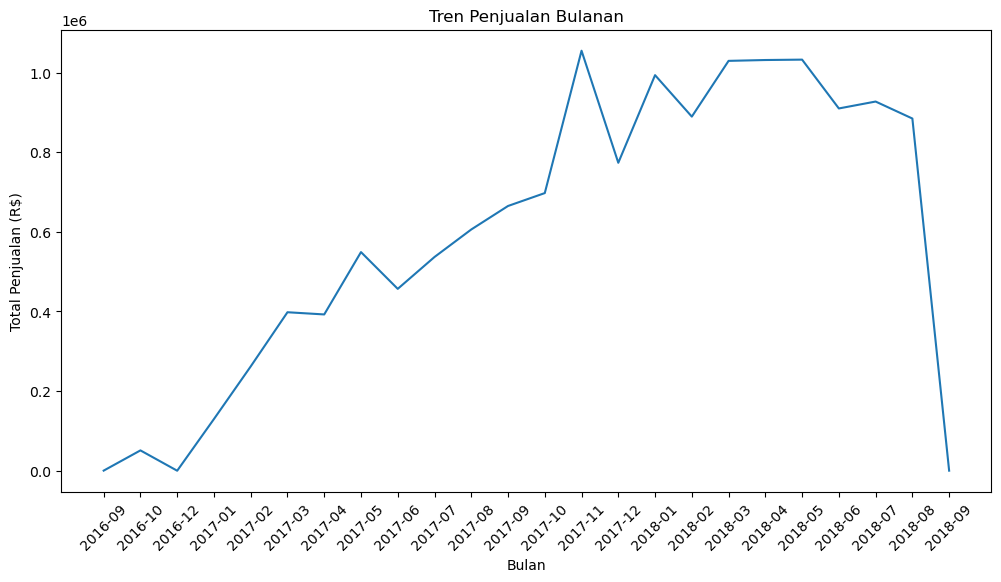

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contoh visualisasi tren penjualan bulanan
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index.astype(str), y=monthly_sales.values)
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan (R$)')
plt.xticks(rotation=45)
plt.show()

# Hitung Penjualan Bulanan dan Identifikasi Bulan Tertinggi/Rendah

In [19]:
list(orders.columns)

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date']

In [20]:
orders.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_order(orders_data, orders_item_data, times='M'):
    # Menggabungkan (merge) dataset order_items dengan orders berdasarkan kolom "order_id".
    # Menggunakan inner join, sehingga hanya baris yang memiliki "order_id" yang sama di kedua dataset yang akan dipertahankan.
    merged_data = pd.merge(orders_item_data, orders_data, on="order_id", how="inner")
    
    # Mengonversi kolom 'order_purchase_timestamp' menjadi format datetime.
    # Parameter errors='coerce' akan mengubah nilai yang tidak bisa dikonversi menjadi NaT (Not a Time).
    merged_data['order_purchase_timestamp'] = pd.to_datetime(merged_data['order_purchase_timestamp'], errors='coerce')
    
    # Menghapus baris-baris yang memiliki nilai kosong (missing values) pada kolom 'order_purchase_timestamp' dan 'price'.
    # Hal ini penting agar perhitungan penjualan tidak terganggu oleh data yang tidak lengkap.
    merged_data = merged_data.dropna(subset=['order_purchase_timestamp', 'price'])
    
    # Mengonversi kolom 'price' menjadi tipe numerik agar operasi matematis (penjumlahan) dapat dilakukan.
    # Jika ada nilai yang tidak bisa dikonversi, akan diubah menjadi NaN.
    merged_data['price'] = pd.to_numeric(merged_data['price'], errors='coerce')
    
    # Menghapus baris yang memiliki nilai NaN pada kolom 'price' setelah konversi.
    merged_data = merged_data.dropna(subset=['price'])
    
    # Membuat kolom baru 'purchase_month' dengan mengekstrak periode bulanan dari kolom 'order_purchase_timestamp'.
    # Hasilnya adalah periode dalam format 'YYYY-MM', misalnya "2017-10".
    merged_data['purchase_month'] = merged_data['order_purchase_timestamp'].dt.to_period('M')
    
    # Mengelompokkan data berdasarkan 'purchase_month' dan menghitung total penjualan (sum) pada kolom 'price'
    # untuk setiap bulan.
    monthly_sales = merged_data.groupby('purchase_month')['price'].sum()
    
    # Mengembalikan hasil agregasi total penjualan per bulan.
    return monthly_sales



In [52]:
monthly_sales_order = calaculate_order(orders, order_items)

In [53]:
# Identifikasi bulan dengan penjualan maksimum dan minimum
max_month = monthly_sales_order.idxmax()
min_month = monthly_sales_order.idxmin()
print(f"Bulan penjualan tertinggi: {max_month}, penjualan: {monthly_sales[max_month]}")
print(f"Bulan penjualan terendah: {min_month}, penjualan: {monthly_sales[min_month]}")

Bulan penjualan tertinggi: 2017-11, penjualan: 1055072.1
Bulan penjualan terendah: 2016-12, penjualan: 10.9


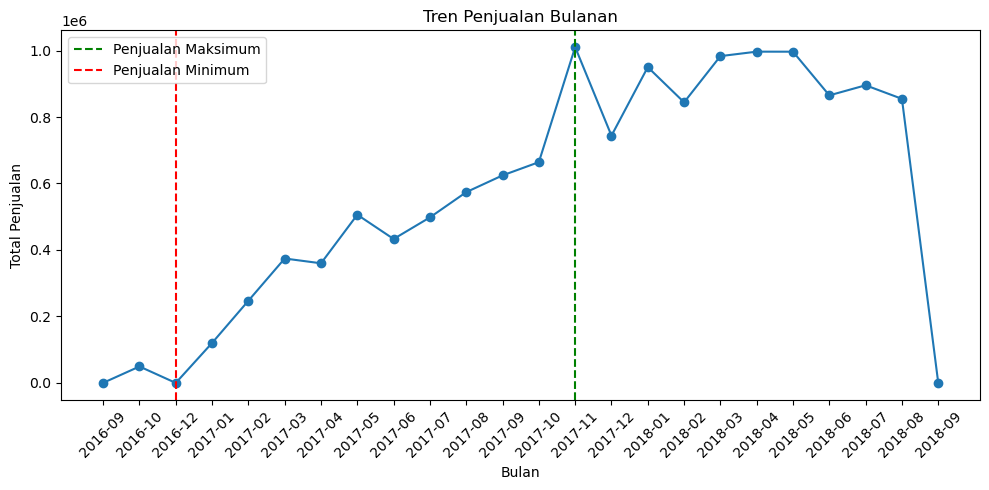

In [54]:
# Visualisasi grafik tren penjualan bulanan
plt.figure(figsize=(10, 5))
plt.plot(monthly_sales_order.index.astype(str), monthly_sales_order.values, marker='o')
plt.title('Tren Penjualan Bulanan')
plt.xlabel('Bulan')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.axvline(x=str(max_month), color='g', linestyle='--', label='Penjualan Maksimum')
plt.axvline(x=str(min_month), color='r', linestyle='--', label='Penjualan Minimum')
plt.legend()
plt.tight_layout()
plt.show()


# Load Data

In [58]:
import sqlite3

def load_data(monthly_sales_df):
    conn = sqlite3.connect('ecommerce_analysis.db')
    monthly_sales_df.to_sql('monthly_sales', conn, if_exists='replace', index=False)
    conn.close()

# Misalnya, jika monthly_sales_df sudah disiapkan:
load_data(monthly_sales_order)